In [1]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 134 kB 3.2 MB/s 


In [2]:
import dask.dataframe as dd
import plotly.express as px
import pandas as pd
import numpy as np

##Importando dados

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive"

'Colab Notebooks'     ImersaoDev_Alura	      Obra.gslides	      Wizard
 Curriculo	     'Iniciação Científica'  'Trem do estagio.gdoc'
'CV_Karine (1).pdf'  'Meet Recordings'	      UFOP
 CV.pdf		      Obra		     'Voluta '


##Verificando dataset

In [5]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/dataframes/olist_new_df.csv')

In [6]:
df = df.compute()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111237 entries, 0 to 111236
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               111237 non-null  float64
 1   order_item_id          111237 non-null  float64
 2   product_id             111237 non-null  float64
 3   seller_id              111237 non-null  float64
 4   price                  111237 non-null  float64
 5   freight_value          111237 non-null  float64
 6   payment_type           111237 non-null  float64
 7   payment_installments   111237 non-null  float64
 8   payment_value          111237 non-null  float64
 9   customer_unique_id     111237 non-null  float64
 10  product_category_name  111237 non-null  float64
 11  product_weight_g       111237 non-null  float64
 12  product_length_cm      111237 non-null  float64
 13  product_height_cm      111237 non-null  float64
 14  product_width_cm       111237 non-nu

In [8]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_unique_id,...,seller_lat,seller_lng,days_to_delivery,early_delivery,day_shipping,month_shipping,year_shipping,day_order_approved,month_order_approved,year_order_approved
0,0.0,1.0,8216.0,812.0,58.9,13.29,1.0,2.0,72.19,48076.0,...,-22.497188,-44.127324,6.0,10.0,19.0,9.0,2017.0,13.0,9.0,2017.0
1,7014.0,1.0,8216.0,812.0,55.9,17.96,0.0,1.0,73.86,5649.0,...,-22.497188,-44.127324,6.0,21.0,5.0,7.0,2017.0,29.0,6.0,2017.0
2,30559.0,1.0,8216.0,812.0,64.9,18.33,1.0,2.0,83.23,18589.0,...,-22.497188,-44.127324,5.0,15.0,23.0,5.0,2018.0,18.0,5.0,2018.0
3,40954.0,1.0,8216.0,812.0,58.9,16.17,1.0,3.0,75.07,82561.0,...,-22.497188,-44.127324,1.0,23.0,7.0,8.0,2017.0,1.0,8.0,2017.0
4,45875.0,1.0,8216.0,812.0,58.9,13.29,1.0,4.0,72.19,4247.0,...,-22.497188,-44.127324,1.0,21.0,16.0,8.0,2017.0,10.0,8.0,2017.0
5,58794.0,1.0,8216.0,812.0,55.9,26.93,1.0,1.0,82.83,18290.0,...,-22.497188,-44.127324,5.0,22.0,3.0,8.0,2017.0,28.0,7.0,2017.0
6,69027.0,1.0,8216.0,812.0,64.9,38.50,0.0,1.0,103.40,17734.0,...,-22.497188,-44.127324,0.0,23.0,26.0,3.0,2018.0,20.0,3.0,2018.0
7,74190.0,2.0,8216.0,812.0,58.9,18.12,0.0,1.0,153.75,47060.0,...,-22.497188,-44.127324,2.0,27.0,14.0,8.0,2017.0,8.0,8.0,2017.0
8,74190.0,1.0,8359.0,812.0,58.9,17.83,0.0,1.0,153.75,47060.0,...,-22.497188,-44.127324,2.0,27.0,14.0,8.0,2017.0,8.0,8.0,2017.0
9,82148.0,1.0,8216.0,812.0,55.9,35.71,3.0,1.0,20.00,5361.0,...,-22.497188,-44.127324,2.0,29.0,9.0,6.0,2017.0,5.0,6.0,2017.0


##Outliers

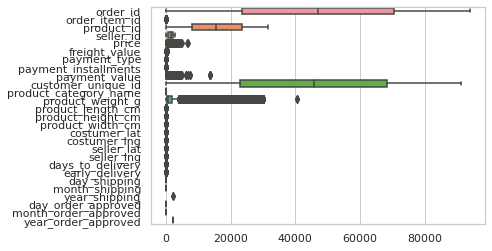

In [9]:
##Outliers
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df, orient="h");


Text(0.5, 0, 'Order_Id')

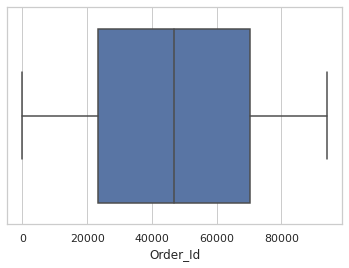

In [10]:
ax = sns.boxplot(x=df["order_id"])
ax.set_xlabel('Order_Id')

Text(0.5, 0, 'Order Item ID')

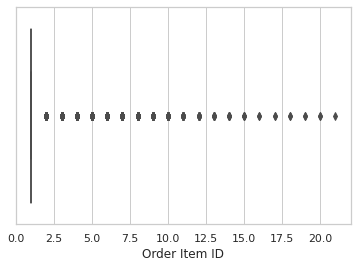

In [11]:
ax = sns.boxplot(x=df["order_item_id"])
ax.set_xlabel('Order Item ID')

Text(0.5, 0, 'Product ID')

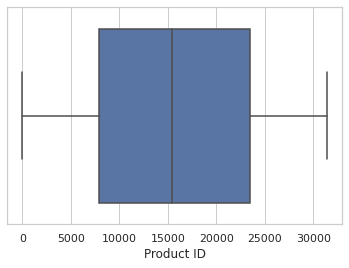

In [12]:
ax = sns.boxplot(x=df["product_id"])
ax.set_xlabel('Product ID')

Text(0.5, 0, 'Seller ID')

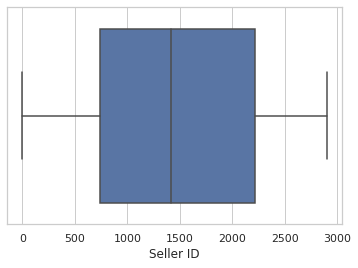

In [13]:
ax = sns.boxplot(x=df["seller_id"])
ax.set_xlabel('Seller ID')

Text(0.5, 0, 'Price')

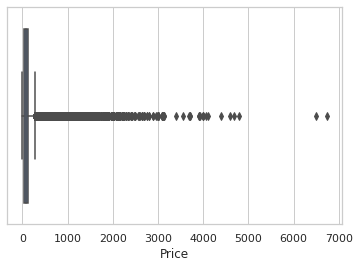

In [14]:
ax = sns.boxplot(x=df["price"])
ax.set_xlabel('Price')


Text(0.5, 0, 'Freight Value')

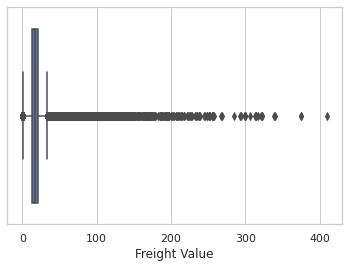

In [15]:
ax = sns.boxplot(x=df["freight_value"])
ax.set_xlabel('Freight Value')

Text(0.5, 0, 'procuct_weight_g')

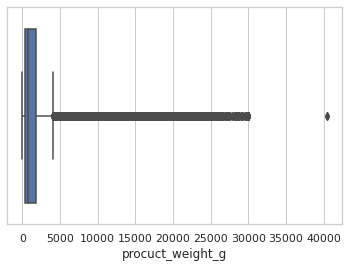

In [16]:
ax = sns.boxplot(x=df["product_weight_g"])
ax.set_xlabel('procuct_weight_g')

Text(0.5, 0, 'days_to_delivery')

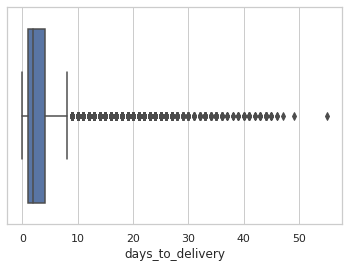

In [17]:
ax = sns.boxplot(x=df["days_to_delivery"])
ax.set_xlabel('days_to_delivery')

In [ ]:
ax = sns.scatterplot(x=df["product_weight_g"], y=)
ax.set_xlabel('procuct_weight_g')